In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ..

/Share/home/shibinbin/projects/Deepfold2


In [268]:
from Bio import AlignIO
import seaborn as sns
sns.set()
import pandas as pd

In [249]:
alignment = AlignIO.read(open("output/TE/Lu_2016_invitro.hg38/TE_transcript_separate.hmmalign/U1.sto"), 
                         "stockholm")
print("Alignment length %i" % alignment.get_alignment_length())
records = {record.id:str(record.seq) for record in alignment}
print('Number of alignments: %d'%len(records))

Alignment length 165
Number of alignments: 22


In [323]:
records.keys()

['14|U1::ENST00000384278.1:0-164',
 '06|U1::ENST00000605806.1:0-164',
 '15|U1::ENST00000384010.1:0-164',
 '17|U1::ENST00000605806.1:0-164',
 '00|U1::ENST00000383925.1:0-164',
 '03|U1::ENST00000384278.1:0-164',
 '19|U1::ENST00000383858.1:0-164',
 '21|U1::ENST00000383861.1:0-164',
 '07|U1::ENST00000615842.1:0-164',
 '20|U1::ENST00000383869.1:0-164',
 '18|U1::ENST00000615842.1:0-164',
 '01|U1::ENST00000384782.1:0-164',
 '05|U1::ENST00000610976.1:0-164',
 '09|U1::ENST00000383869.1:0-164',
 '02|U1::ENST00000384659.1:0-164',
 '10|U1::ENST00000383861.1:0-164',
 '12|U1::ENST00000384782.1:0-164',
 '13|U1::ENST00000384659.1:0-164',
 '16|U1::ENST00000610976.1:0-164',
 '08|U1::ENST00000383858.1:0-164',
 '11|U1::ENST00000383925.1:0-164',
 '04|U1::ENST00000384010.1:0-164']

In [324]:
cm

<module 'matplotlib.cm' from '/dev/shm/shibinbin/anaconda2/lib/python2.7/site-packages/matplotlib/cm.pyc'>

In [225]:
def plot_column_statistic(x, ylabel='Statistic'):
    fig, ax = plt.subplots(figsize=(18, 3))
    sns.barplot(np.arange(x.shape[0]), x, edgecolor='b', color='b')
    ax.set_ylabel(ylabel)
    ax.set_xticklabels([])
    ax.set_xlabel('Position')

In [250]:
align_array = np.array([list(rec.upper()) for rec in alignment], np.character)
n_seqs, n_columns = align_array.shape

In [251]:
alphabet = np.unique(align_array.flat)
print alphabet

['-' 'A' 'C' 'G' 'T']


In [210]:
NucleotideColorMap = matplotlib.colors.ListedColormap(['white', 'red', 'light_green', 'orange', 'blue'])
NucleotideColorMap = matplotlib.colors.ListedColormap(np.array([[1.0, 1.0, 1.0],
                                                       [1.0, 0.0, 0.0],
                                                       [0.0, 1.0, 0.0],
                                                       [1.0, 0.65, 0.0],
                                                       [0.0, 0.0, 1.0]]))

In [252]:
# onehot coding of the alignment, shape: (n_seqs, n_columns, alphabet_size)
align_onehot = align_array[:, :, np.newaxis] == alphabet[np.newaxis, np.newaxis, :]

In [253]:
# integer coding of the alignment, shape: (n_seqs, n_columns)
align_integer = np.argmax(align_onehot, axis=-1)

In [254]:
align_integer

array([[1, 4, 1, ..., 4, 3, 0],
       [1, 4, 1, ..., 4, 3, 0],
       [1, 4, 1, ..., 4, 3, 0],
       ..., 
       [1, 4, 1, ..., 4, 3, 0],
       [1, 4, 1, ..., 4, 3, 0],
       [1, 4, 1, ..., 4, 3, 0]])

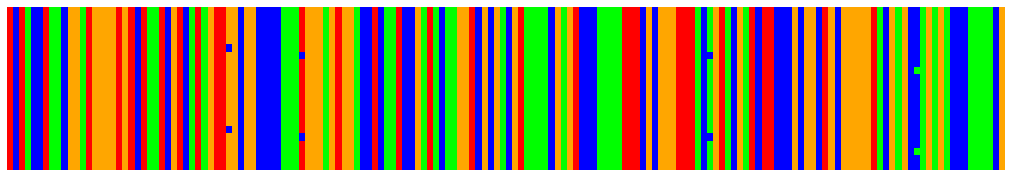

In [255]:
# plot sequence alignment
fig, ax = plt.subplots(figsize=(18, 3))
sns.heatmap(align_integer, cmap=NucleotideColorMap,
                norm=matplotlib.colors.Normalize(),
                xticklabels=False, yticklabels=False, ax=ax, cbar=False)

In [256]:
# occureneces of each residual in each column, shape: (n_columns, alphabet_size)
occurrences = np.sum(align_onehot, axis=0)

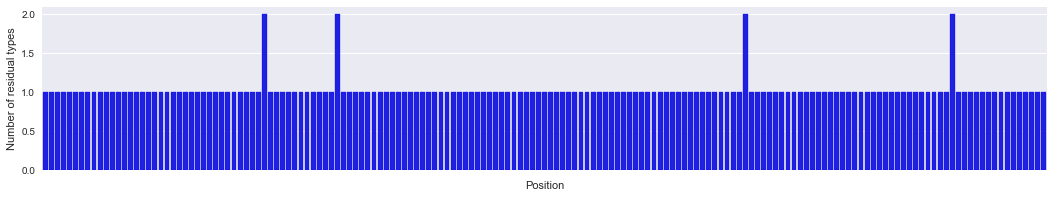

In [257]:
# number of distinct residual types in each column, shape: (n_columns)
n_residual_types = np.sum(occurrences > 0, axis=1)
n_residual_types[:10]
plot_column_statistic(n_residual_types, ylabel='Number of residual types')

In [258]:
# normalized occurrences of each residual in each column
frequencies = occurrences.astype(np.float64)/n_seqs

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


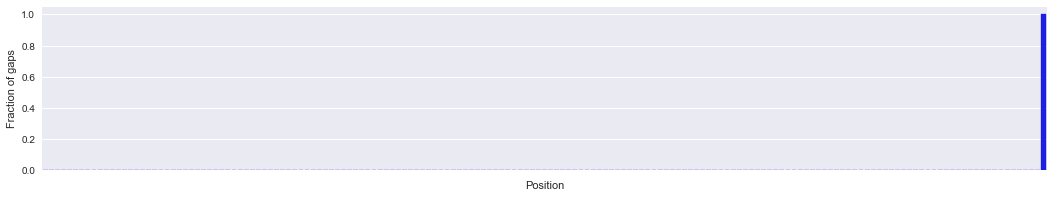

In [259]:
# fraction of gaps in each column, shape: (n_columns)
gaps = np.sum(align_onehot[:, :, 0], axis=0).astype(np.float64)/n_seqs
print gaps[:10]
plot_column_statistic(gaps, ylabel='Fraction of gaps')

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


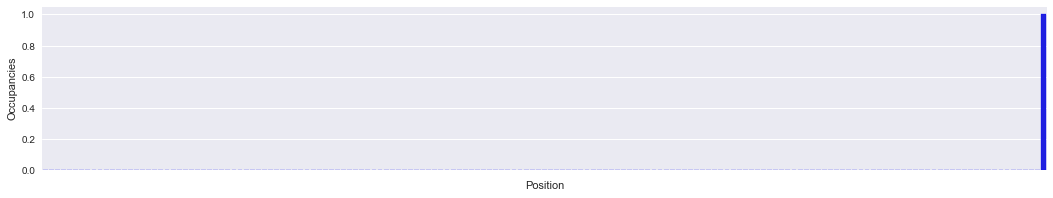

In [260]:
# fraction of residuals excluding gaps('-') in each column, shape: (n_columns)
occupancies = 1.0 - gaps
print occupancies[:10]
plot_column_statistic(gaps, ylabel='Occupancies')

In [261]:
# most frequent residuals in each column, shape: (n_columns,)
consensus = alphabet[np.argmax(occurrences, axis=1)]
print ''.join(consensus)

ATACTTACCTGGCAGGGGAGATACCATGATCACGAAGGTGGTTTTCCCAGGGCGAGGCTTATCCATTGCACTCCGGATGTGCTGACCCCTGCGATTTCCCCAAATGTGGGAAACTCGACTGCATAATTTGTGGTAGTGGGGGACTGCGTTCGCGCTTTCCCCTG-


In [264]:
# number of residuals in each sequence that is different from the consensus
n_mutations = np.sum(align_array != consensus[np.newaxis, :], axis=1)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


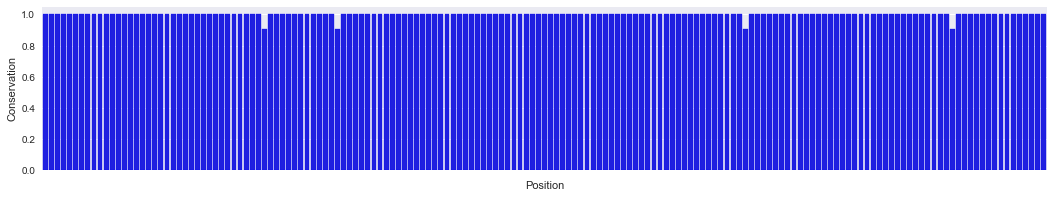

In [263]:
# proportion of same residuals as consensus sequences in each column, shape: (n_columns)
# conservation = (number of most frequent residual) / (total number of sequences)
conservation = np.max(occurrences, axis=1).astype(np.float32)/n_seqs
print conservation[:10]
plot_column_statistic(conservation, ylabel='Conservation')

[ 0.44389396  0.34883079  0.38399168  0.29412105  0.15836748  0.29412105
  0.29412105  0.29412105  0.23815038  0.20403248]


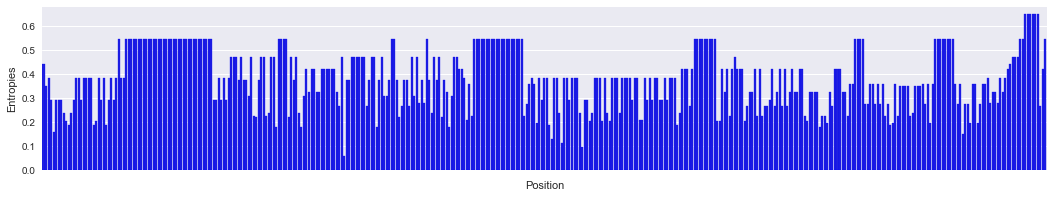

In [243]:
# unweighted entropy in each column, shape: (n_columns,)
# entropy = 1/log(n_residual_types)
entropy_scales = np.log(n_residual_types)
entropy_scales[n_residual_types == 1] = 1
entropy_scales = np.log(len(alphabet))
frequencies_smoothed = (occurrences + 1).astype(np.float64)/(n_seqs + len(alphabet))
entropies = 1 + np.sum(frequencies_smoothed*np.log(frequencies_smoothed), axis=1)/entropy_scales
print entropies[:10]
plot_column_statistic(entropies, ylabel='Entropies')

In [278]:
rep_table = pd.read_table('data/UCSC/hg38/RepeatMasker.classes.txt',
                          header=None, names=['repName', 'repClass', 'repFamily'])
print 'Number of repeat names: ', rep_table.shape[0]
print 'Repeat classes: ', ','.join(rep_table['repClass'].unique())
print 'Repeat families: ', ','.join(rep_table['repFamily'].unique())
rep_table.head()

Number of repeat names:  15482
Repeat classes:  rRNA,RNA,srpRNA,Simple_repeat,Satellite,SINE,Low_complexity,DNA,scRNA,LINE,SINE?,LTR,DNA?,Unknown,RC,RC?,LTR?,Retroposon,tRNA,snRNA
Repeat families:  rRNA,RNA,srpRNA,Simple_repeat,acro,centr,Alu,5S-Deu-L2,tRNA-Deu,Low_complexity,hAT-Tip100,scRNA,hAT-Blackjack,Satellite,hAT-Charlie,PIF-Harbinger,CR1,tRNA,TcMar,ERV1,ERVL,DNA?,DNA,Unknown,TcMar?,L1,hAT-Tip100?,Helitron,Helitron?,ERVK,TcMar-Mariner,TcMar-Tc2,L2,RTE-X,PiggyBac,ERV1?,Gypsy,LTR,ERVL?,Gypsy?,Dong-R4,LTR?,TcMar-Tigger,hAT,hAT?,RTE-BovB,tRNA-RTE,TcMar-Pogo,Merlin,MIR,ERVL-MaLR,hAT-Ac,Penelope,telo,MULE-MuDR,SVA,snRNA,hAT-Tag1,PiggyBac?,SINE?


,repName,repClass,repFamily
0,5S,rRNA,rRNA
1,7SK,RNA,RNA
2,7SLRNA,srpRNA,srpRNA
3,(AAAAAAC)n,Simple_repeat,Simple_repeat
4,(AAAAAAG)n,Simple_repeat,Simple_repeat


In [284]:
hmmalign_stats = pd.read_table('output/TE/Lu_2016_invitro.hg38/TE_transcript_separate.hmmalign.stats.txt')
hmmalign_stats.rename(columns={'name': 'repName'}, inplace=True)
hmmalign_stats.index = hmmalign_stats['repName']
hmmalign_stats = pd.merge(hmmalign_stats, rep_table, on='repName')
hmmalign_stats.head()

,entropy_avg,mutation_count_avg,n_seqs,repName,gap_fraction_avg,n_columns,conservation_avg,Unnamed: 7,repClass,repFamily
0,0.083484,0.000000,2,7SK,0.274096,332,1.000000,NaN,RNA,RNA
1,0.385110,77.600000,20,7SLRNA,0.360486,329,0.764134,NaN,srpRNA,srpRNA
2,0.481342,111.243243,74,AluJb,0.430764,405,0.725325,NaN,SINE,Alu
3,0.314057,142.181818,22,AluJo,0.490959,367,0.612584,NaN,SINE,Alu
4,0.107870,130.500000,4,AluJr4,0.586478,318,0.589623,NaN,SINE,Alu


In [295]:
ax = axes[1]
ax.get_xticklabels()[0]

In [308]:
# plot distribution of statistics for each family
def plot_stats_boxplot(stat_name):
    fig, axes = plt.subplots(2, 1, figsize=(16, 8))
    sns.boxplot(x='repClass', y=stat_name, data=hmmalign_stats, 
                fliersize=3, color='w', linewidth=1.2, ax=axes[0])
    sns.boxplot(x='repFamily', y=stat_name, data=hmmalign_stats,
                fliersize=3, color='w', linewidth=1.2, ax=axes[1])
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
    return axes

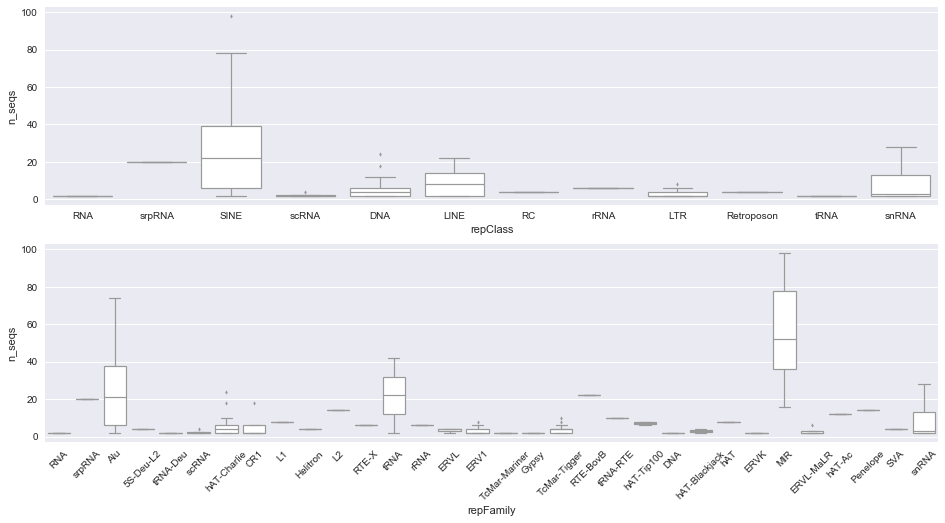

In [310]:
axes = plot_stats_boxplot('n_seqs')

(0, 300)

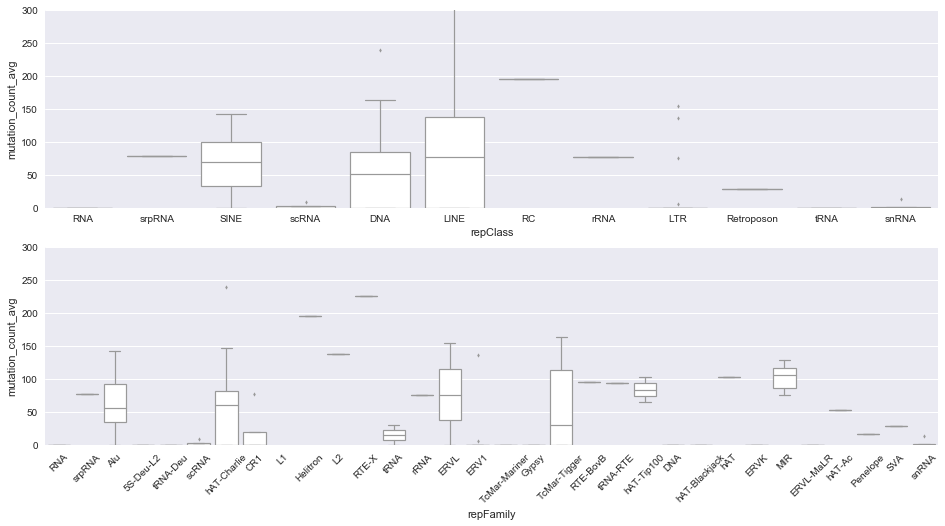

In [313]:
axes = plot_stats_boxplot('mutation_count_avg')
axes[0].set_ylim(0, 300)
axes[1].set_ylim(0, 300)

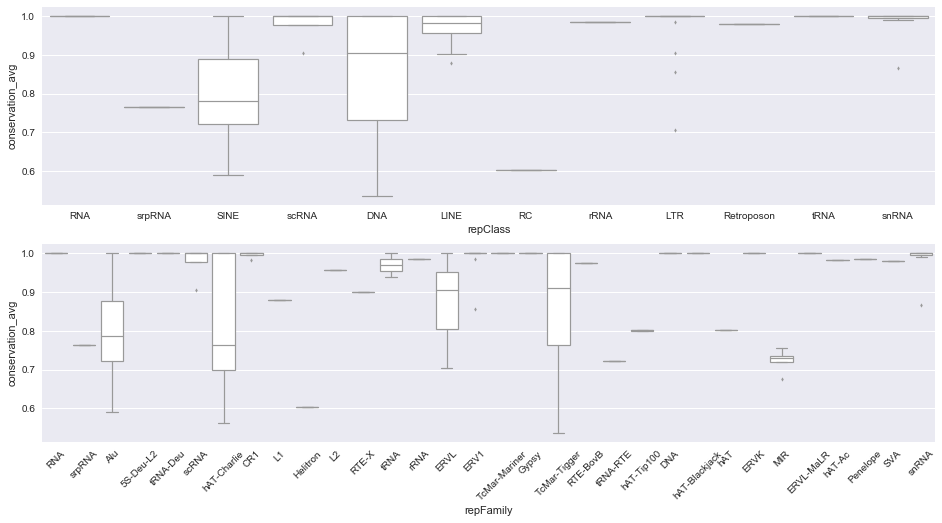

In [315]:
axes = plot_stats_boxplot('conservation_avg')

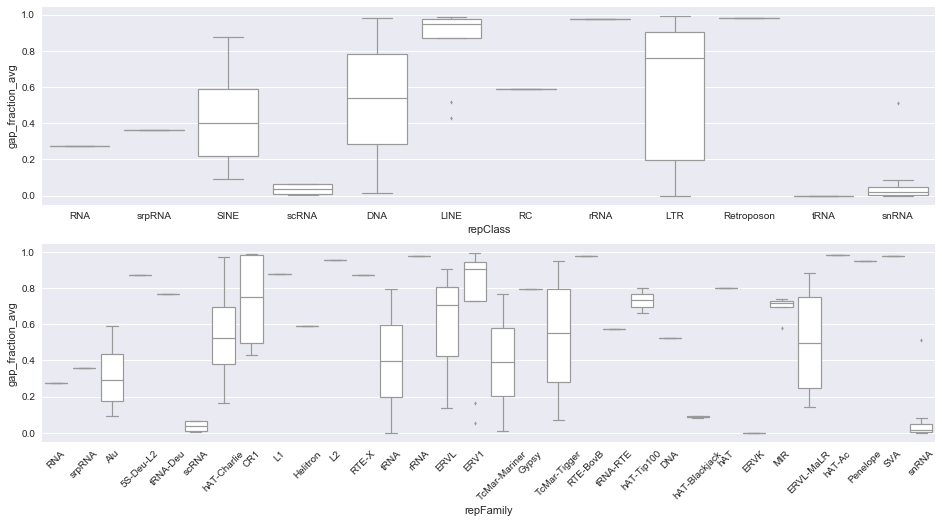

In [316]:
axes = plot_stats_boxplot('gap_fraction_avg')

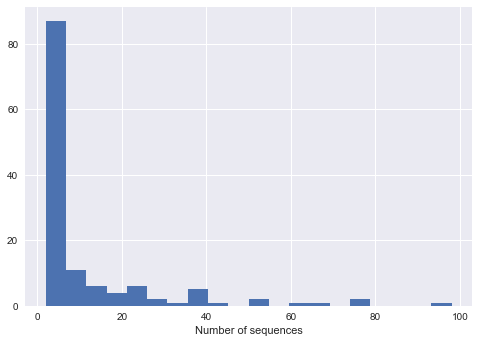

In [276]:
fig, ax = plt.subplots()
ax.hist(hmmalign_stats['n_seqs'], bins=20)
ax.set_xlabel('Number of sequences')

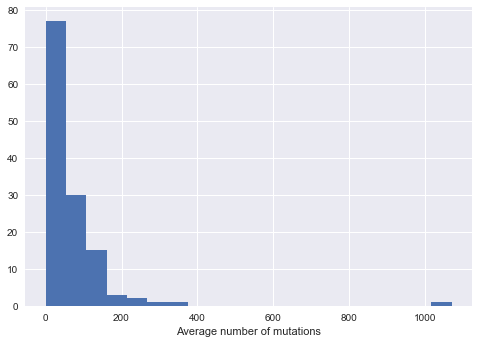

In [277]:
fig, ax = plt.subplots()
ax.hist(hmmalign_stats['mutation_count_avg'], bins=20)
ax.set_xlabel('Average number of mutations')

In [322]:
hmmalign_stats.query('repFamily == "Alu"')

,entropy_avg,mutation_count_avg,n_seqs,repName,gap_fraction_avg,n_columns,conservation_avg,Unnamed: 7,repClass,repFamily
2,0.481342,111.243243,74,AluJb,0.430764,405,0.725325,NaN,SINE,Alu
3,0.314057,142.181818,22,AluJo,0.490959,367,0.612584,NaN,SINE,Alu
4,0.107870,130.500000,4,AluJr4,0.586478,318,0.589623,NaN,SINE,Alu
5,0.423635,138.774194,62,AluJr,0.491852,388,0.642335,NaN,SINE,Alu
6,0.083484,0.000000,2,AluSc5,0.219745,314,1.000000,NaN,SINE,Alu
7,0.241732,32.333333,6,AluSc8,0.091463,328,0.901423,NaN,SINE,Alu
8,0.471486,70.277778,36,AluSc,0.219894,334,0.789587,NaN,SINE,Alu
9,0.262661,116.500000,12,AluSg4,0.403631,358,0.674581,NaN,SINE,Alu
10,0.195647,69.000000,6,AluSg7,0.433544,316,0.781646,NaN,SINE,Alu
11,0.406412,42.142857,14,AluSg,0.102287,331,0.872680,NaN,SINE,Alu


In [ ]:
rep_